<a href="https://colab.research.google.com/github/James-Kahugu/project-phase-1/blob/main/Movie_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name: James Kahugu
* Student pace: part time
* Scheduled project review date/time: 3/8/2025
* Instructor name: Noah
* Blog post URL: https://colab.research.google.com/drive/1oteRSEp30riJfHa0cuIUxsGqCYPZzq2h#scrollTo=3du4nnnAtpzD

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load in data and preview


In [ ]:
df = pd.read_csv('bom.movie_gross.csv',)

df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


The foreign_gross column seems to contain null values and its numeric

In [ ]:
#lets desribe our data
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [ ]:
use_cols = ['title',
            'studio',
            'domestic_gross',
            'foreign_gross',
            'year'
            ]

df = df[['title','studio','domestic_gross','foreign_gross','year']]
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


we have 5 columns and 3387 rows but some seem to have nissing values.

some are numeric and others norminal

In [ ]:
#lets get the columns
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

Rename title to movie title

In [ ]:
df.rename(columns = {'title' : 'movie_title'},inplace=True)
df

,movie_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


##Data Cleaning

-Change the foreign gross column to numeric

-lets check for null values in each column

In [ ]:
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')
df

,movie_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [ ]:
df.isna().sum()

,0
movie_title,0
studio,5
domestic_gross,28
foreign_gross,1355
year,0


The foreign_gross column seem to have the most null value followed by domestic_gross column and also studio has a few null values

-Lets get the proportion of the missing values

In [ ]:
df.isna().mean()

,0
movie_title,0.000000
studio,0.001476
domestic_gross,0.008267
foreign_gross,0.400059
year,0.000000


-The foreign_gross has 40% of missing values

Lets check for unique values number in each column

In [ ]:
df.nunique().value_counts()

,count
3386,1
257,1
1797,1
1199,1
9,1


Now lets check for the rows with the null values

In [ ]:
df[df.isna().any(axis=1)]

,movie_title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000.0,2010
222,Flipped,WB,1800000.0,NaN,2010
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


We fill the null values of the studio column with 'None'

With the domestic column we will use the mean to ipute the missing values.

Withe the foreign gross column we use the missing value indicator and fill it with the median


In [ ]:
df['studio'] = df['studio'].fillna('None')
df

,movie_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [ ]:
df['domestic_gross'] = df['domestic_gross'].fillna(df['domestic_gross'].mean())
df

,movie_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [ ]:
df['foreign_gross'] = df['foreign_gross'].fillna(df['foreign_gross'].median())
df

,movie_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18900000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,18900000.0,2018
3384,El Pacto,Sony,2500.0,18900000.0,2018
3385,The Swan,Synergetic,2400.0,18900000.0,2018


Change the foreign_gross to float or integer

In [ ]:
df['foreign_gross'] = df['foreign_gross'].astype(float)

We fill the studios null values with no studio
We fill in the

In [ ]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Check for duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

No duplicates


##Data Analysis and Visualization

Add a new column "Total gross"

In [ ]:
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']
df

,movie_title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18900000.0,2018,1.890620e+07
3383,Edward II (2018 re-release),FM,4800.0,18900000.0,2018,1.890480e+07
3384,El Pacto,Sony,2500.0,18900000.0,2018,1.890250e+07
3385,The Swan,Synergetic,2400.0,18900000.0,2018,1.890240e+07


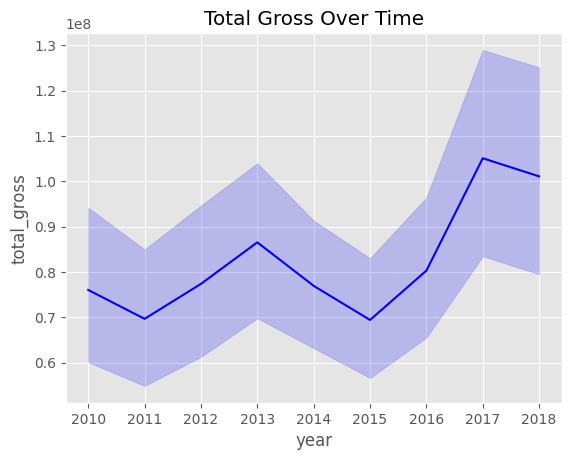

In [ ]:
sns.lineplot(data=df, x='year', y='total_gross', color='b')
plt.title('Total Gross Over Time')
plt.show()

Histogram plots to check the foreign and domestic gross distribution

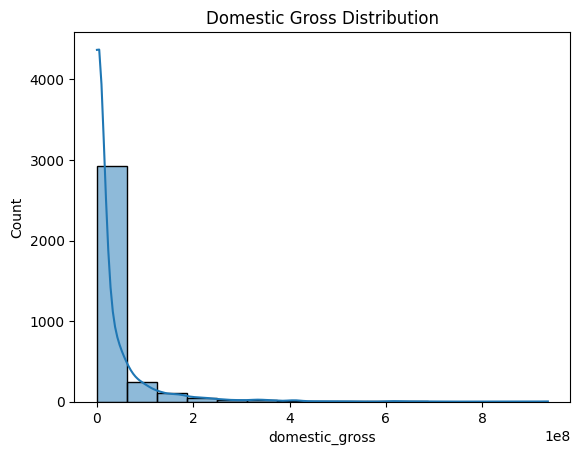

In [ ]:
sns.histplot(df['domestic_gross'],bins=15,kde=True)
plt.title('Domestic Gross Distribution')
plt.show()

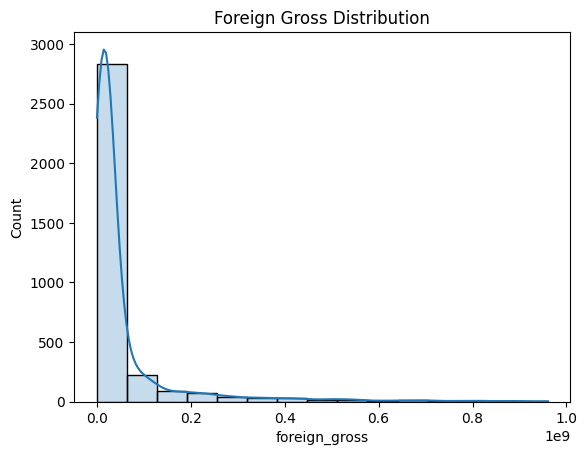

In [ ]:
sns.histplot(df['foreign_gross'],bins=15, kde=True, alpha=0.25, label='')
plt.title('Foreign Gross Distribution')
plt.show()

DIstribution is positively skewed meaning the distribution goes from high to low.

Text(0.5, 1.0, 'Domestic and Foreign Gross Over Time')

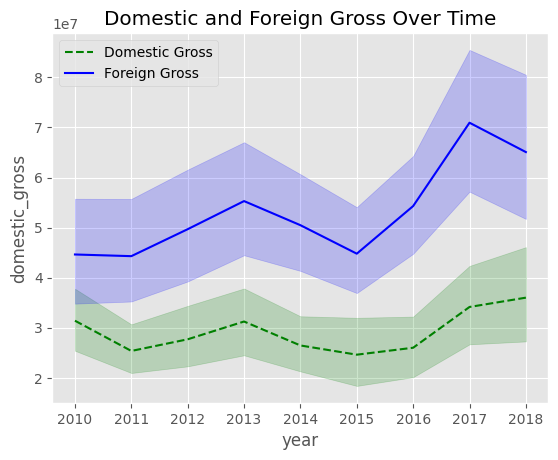

In [ ]:
plt.style.use('ggplot')
sns.lineplot(data=df, x='year', y='domestic_gross', ls='--',
             color='g', label='Domestic Gross')
sns.lineplot(data=df, x='year', y='foreign_gross', color='b', label='Foreign Gross')
plt.title('Domestic and Foreign Gross Over Time')

Boxplots to check for outliers

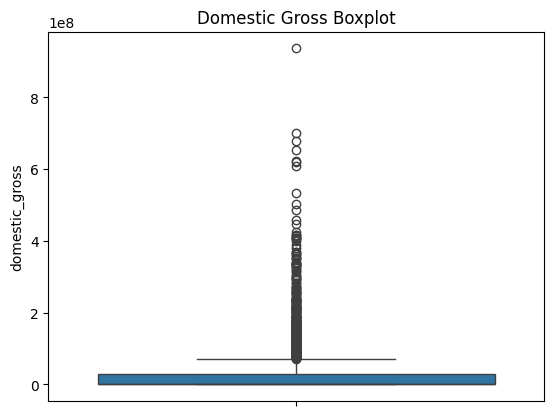

In [ ]:
sns.boxplot(df['domestic_gross'])
plt.title('Domestic Gross Boxplot')
plt.show()


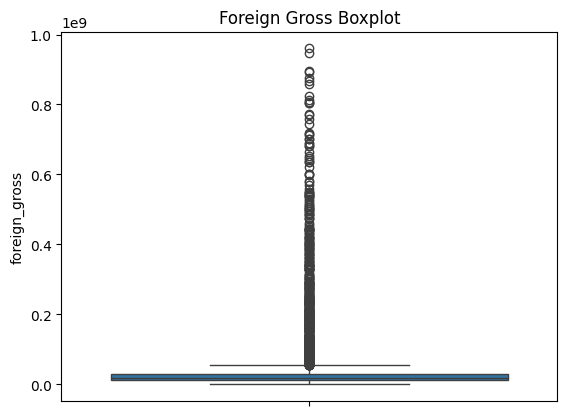

In [ ]:
sns.boxplot(df['foreign_gross'])
plt.title('Foreign Gross Boxplot')
plt.show()

Data contains a lot of outliers but we keep them as they are true data and removing them can alter the analysis

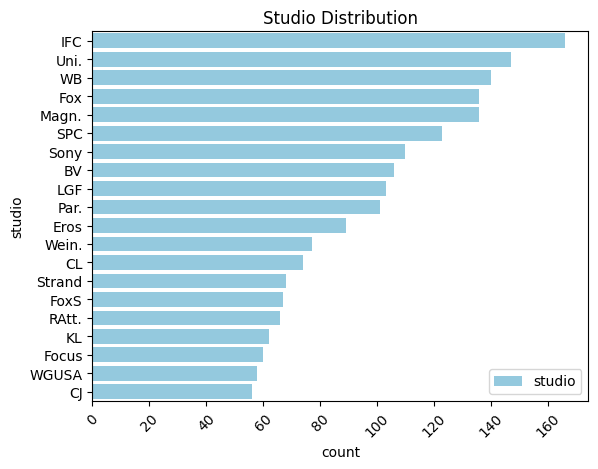

In [ ]:
sns.countplot(data=df, y='studio', order=df['studio'].value_counts().index[:20],
              color='skyblue',label='studio')
plt.title('Studio Distribution')
plt.xticks(rotation=45)
plt.legend()
plt.show()

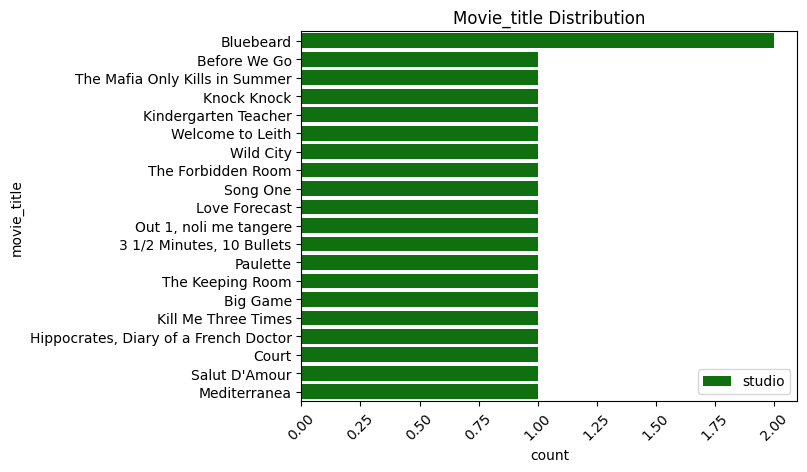

In [ ]:
sns.countplot(data=df, y='movie_title', order=df['movie_title'].value_counts().index[:20],
              color='green',label='studio')
plt.title('Movie_title Distribution')
plt.xticks(rotation=45)
plt.legend()
plt.show()

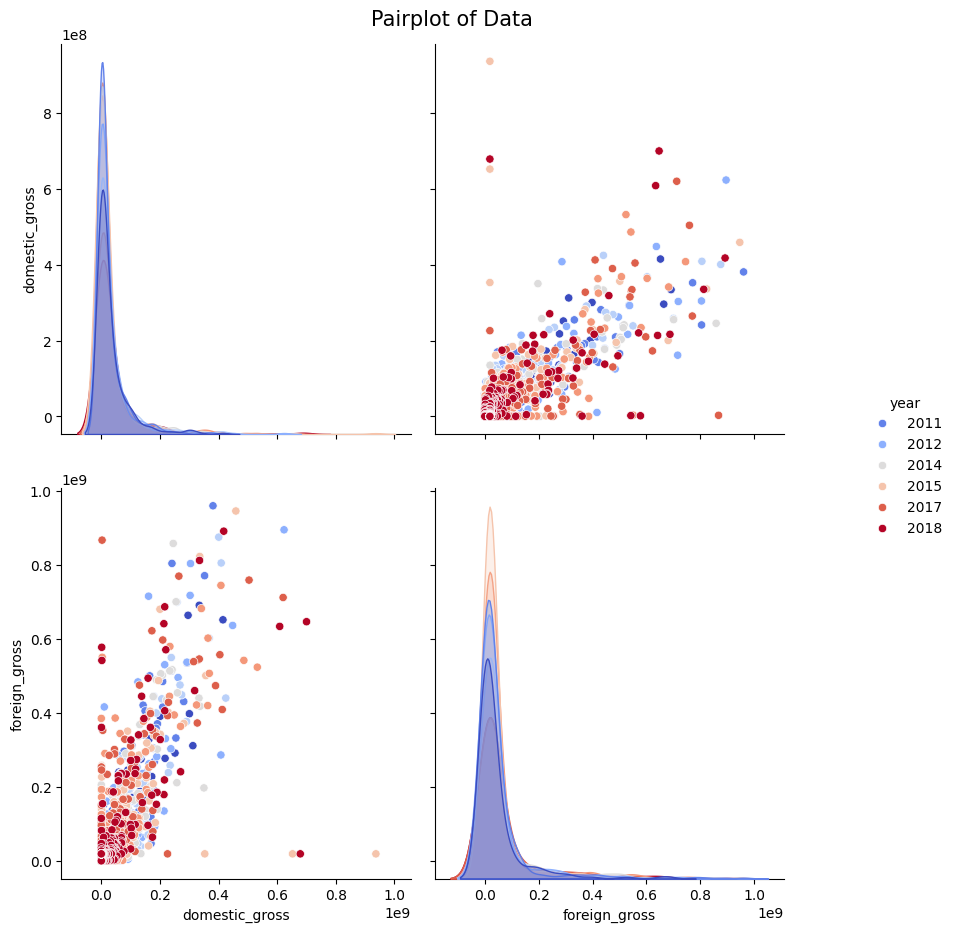

In [ ]:
#lets do a pairplot
fig = sns.pairplot(df, hue='year', palette='coolwarm')
fig.fig.suptitle('Pairplot of Data', fontsize=15)
fig.fig.set_size_inches(10, 10)
plt.show()

They seem to have a positive corelation and a few outliers

/tmp/ipython-input-2820773864.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='domestic_gross', y='foreign_gross',


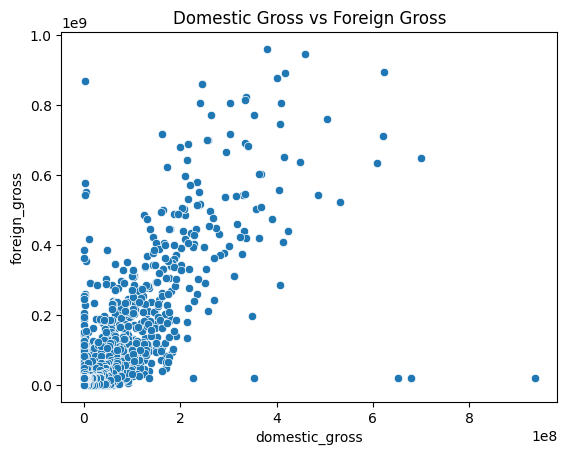

In [ ]:
#scatterplot
sns.scatterplot(data=df, x='domestic_gross', y='foreign_gross',
                palette='dark')
plt.title('Domestic Gross vs Foreign Gross')
plt.show()

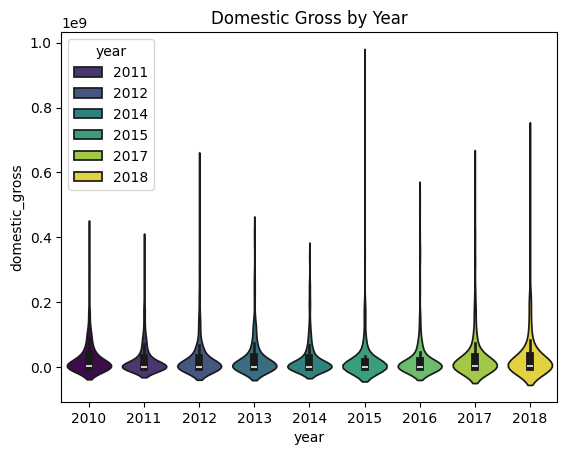

In [ ]:
sns.violinplot(data=df, x='year', y='domestic_gross', hue='year',
               palette='viridis')
plt.title('Domestic Gross by Year')
plt.show()

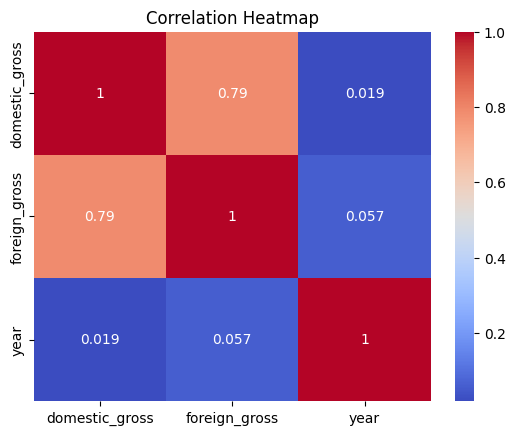

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There is positive corrilations

In [ ]:
df2 = df.groupby(['movie_title'])['domestic_gross'].sum().sort_values(ascending=False).head(10)
df2

,domestic_gross
movie_title,
Star Wars: The Force Awakens,936700000.0
Black Panther,700100000.0
Avengers: Infinity War,678800000.0
Jurassic World,652300000.0
Marvel's The Avengers,623400000.0
Star Wars: The Last Jedi,620200000.0
Incredibles 2,608600000.0
Rogue One: A Star Wars Story,532200000.0
Beauty and the Beast (2017),504000000.0


In [ ]:
df3 = df.groupby(['movie_title'])['foreign_gross'].sum().sort_values(ascending=False).head(10)
df3

,foreign_gross
movie_title,
Harry Potter and the Deathly Hallows Part 2,960500000.0
Avengers: Age of Ultron,946400000.0
Marvel's The Avengers,895500000.0
Jurassic World: Fallen Kingdom,891800000.0
Frozen,875700000.0
Wolf Warrior 2,867600000.0
Transformers: Age of Extinction,858600000.0
Minions,823400000.0
Aquaman,812700000.0


seems like movies that are more of science fiction and animations have the highest domestic and foreign gross.